## model try


### Load libraries

In [1]:
from cv2 import cv2
import os
import json
import time

import pathlib
from torch.utils.data import DataLoader
import sys
sys.path.append('../')
sys.path.append('../')
from src.data.my_dataset import XRayDataSet
from src.data.my_dataset import collate_fn
from src.data.my_dataset import XRayDataSet
from src.data.my_dataset import collate_fn
from src.models.utils import *
from tqdm import tqdm

#for model
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator, RPNHead, RegionProposalNetwork
from torchvision.models.detection.faster_rcnn import *
import torch

In [2]:
#Set path to root dir (wrist folder)
root_dir = pathlib.Path('../literature/Other/supervisely')

# Path to annotation dir
ann_dir = pathlib.Path(root_dir, 'wrist/ann')

# Path to image dir
img_dir = pathlib.Path(root_dir, 'wrist/img')

# Lists
list_files = lambda start_dir: [str(item) for item in start_dir.iterdir()]
ann_list = list_files(ann_dir)
img_list = list_files(img_dir)
print('Number of annotations: {}'.format(len(ann_list)))

Number of annotations: 20327


In [4]:
print(os.getcwd())  

c:\Users\spiro\OneDrive\Υπολογιστής\Thesis\Project\master_thesis_dtu\notebooks


In [50]:
 #defines
NumOfClasses = 3 
NumOfEpochs = 10
BatchSize = 2
num_workers = 1

In [51]:
#load train data
train_dataset = XRayDataSet(pathlib.Path('../literature/Other/supervisely/wrist/pickle_data'))
training_dataloader = DataLoader(train_dataset, batch_size=BatchSize, shuffle=True, num_workers=num_workers,collate_fn=collate_fn)

In [52]:
images , targets = next(iter(training_dataloader))

In [56]:
for imgs, annotations in tqdm(training_dataloader):
            #imgs, annotations = imgs.to(device), annotations.to(device)
            imgs =list(img.to(device) for img in imgs)
            #annotations = [{k: v for k, v in t[0].items()} for t in annotations]

            ####-----------MOVE annotations to device---------------#####

            # Iterate over the list of dicts and move each tensor to the device
            for annotation in annotations:
                for key, value in annotation.items():
                    if isinstance(value, torch.Tensor):
                        annotation[key] = value.to(device)

  0%|          | 0/10 [00:05<?, ?it/s]


AttributeError: 'list' object has no attribute 'items'

In [54]:
targets

([{'boxes': tensor([[645.,  86., 690., 152.],
           [210., 661., 335., 731.],
           [404., 699., 474., 777.]]),
   'labels': tensor([2, 1, 1]),
   'image_id': tensor([4]),
   'area': tensor([2970, 8750, 5460]),
   'iscrowd': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0

In [55]:
annotations

[{'boxes': tensor([[ 35., 222.,  80., 296.]]),
  'labels': tensor([2]),
  'image_id': tensor([11]),
  'area': tensor([3330]),
  'iscrowd': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [43]:
# Iterate over the list of dicts and move each tensor to the device
for annotation in targets:
    for key, value in annotation.items():
        if isinstance(value, torch.Tensor):
             annotation[key] = value.to(device)

In [45]:
targets

[{'boxes': tensor([[347., 450., 369., 476.],
          [366., 502., 389., 564.],
          [163., 502., 255., 595.]]),
  'labels': tensor([2, 2, 1]),
  'image_id': tensor([9]),
  'area': tensor([ 572, 1426, 8556]),
  'iscrowd': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}]

In [42]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu') 
annotations = [{k: v for k, v in t[0].items()} for t in targets]

KeyError: 0

In [41]:
targets

[{'boxes': tensor([[347., 450., 369., 476.],
          [366., 502., 389., 564.],
          [163., 502., 255., 595.]]),
  'labels': tensor([2, 2, 1]),
  'image_id': tensor([9]),
  'area': tensor([ 572, 1426, 8556]),
  'iscrowd': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}]

In [29]:
len(images)

2

In [18]:
imgs =list(img.squeeze(dim=0) for img in images)

In [27]:
imgs[0].shape


torch.Size([3, 970, 634])

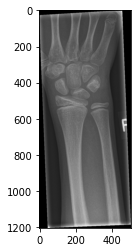

In [24]:
# Convert the tensor to a numpy array
numpy_image = imgs[1].numpy()

# Transpose the dimensions to match the expected order of matplotlib
# (height, width, channels)
numpy_image = numpy_image.transpose(1, 2, 0)

# Display the image using matplotlib
plt.imshow(numpy_image)
plt.show()

In [69]:
import torch
import torchvision.transforms as transforms

# Load the image tensor
img_tensor = imgs[0]  # replace with your image tensor

# Convert the tensor to a PIL Image object

to_pil = transforms.ToPILImage(mode='RGB')
pil_image = to_pil(img_tensor)

# Display the image
pil_image.convert("L").show()

In [74]:
from PIL import Image

# Load the RGB image tensor
tensor = imgs[0]  # replace with your tensor
img_rgb = tensor.permute(1, 2, 0).numpy()  # convert tensor to numpy array

# Convert the numpy array to a black and white PIL Image
img_bw = Image.fromarray(img_rgb.astype('uint8')).convert('L')

# Display the image
img_bw.show()

In [3]:
idx = 1
root_dir = pathlib.Path('../literature/Other/supervisely')
img_path = os.path.join(img_list[idx])
ann_path = os.path.join(ann_list[idx])

In [111]:
name = pathlib.PurePath(ann_path).name.split('.')[0]
image = img_dir / (str(name) + '.png')
img = Image.open(img_path)

In [98]:
img = img.convert("RGB")

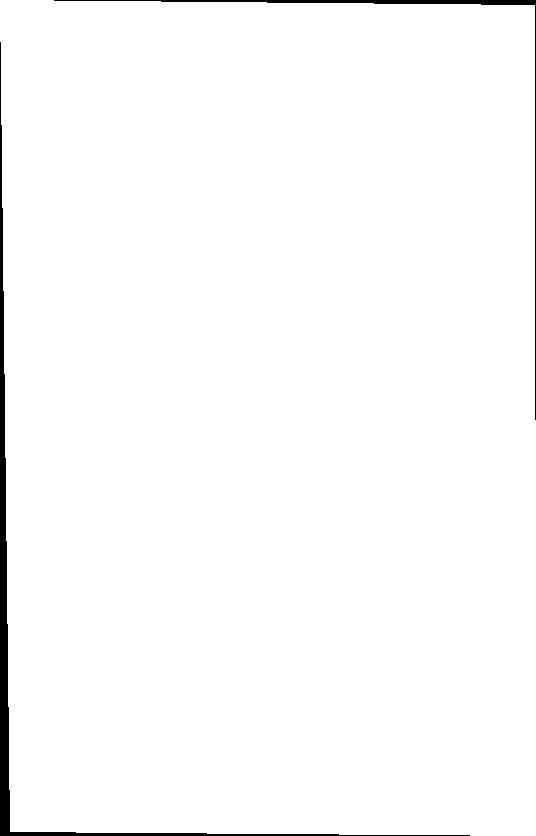

In [109]:
img

In [112]:
import numpy as np
# Convert the grayscale image to RGB and duplicate the grayscale channel
img_rgb = np.stack((img,)*3, axis=-1)

# Convert the numpy array to a PIL Image object
img_rgb = Image.fromarray(np.uint8(img_rgb))

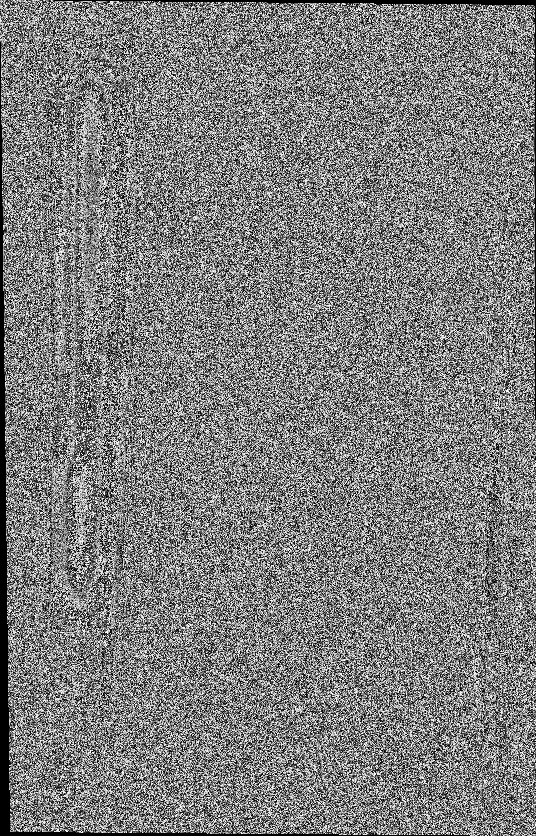

In [113]:
img_rgb

In [4]:
# Load the grayscale image file
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Convert the grayscale image to RGB and duplicate the grayscale channel
img_rgb = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)

In [5]:
# Display the image in a window
cv2.imshow('image', img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

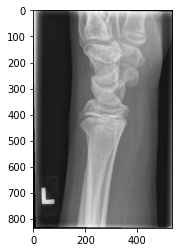

In [6]:
numpy_image = img_rgb

# Display the image using matplotlib
plt.imshow(numpy_image)
plt.show()

In [7]:
img_rgb.shape

(836, 536, 3)

In [8]:
import torchvision.transforms as T
img = T.ToTensor()(img_rgb).float()

In [10]:
img.shape


torch.Size([3, 836, 536])

In [126]:
img_gray.shape

(836, 536)

In [ ]:
#load the model state
model = get_model_instance_segmentation(3)
model.load_state_dict(torch.load(f'my_first_model.pt',map_location=torch.device('cpu')))

test my data now


In [102]:
#load train data
train_dataset = XRayDataSet(pathlib.Path('../literature/Other/supervisely/wrist/train_pickles'))
training_dataloader = DataLoader(train_dataset, batch_size=BatchSize, shuffle=True, num_workers=num_workers,collate_fn=collate_fn)

In [103]:
images , targets = next(iter(training_dataloader))

In [104]:
images

(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]]]),
 tensor([[[[1.8007e-05, 1.7053e-05, 1.6435e-05,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [1.7324e-05, 1.6446e-05, 1.5297e-05,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [1.6305e-05, 1.5307e-05, 1.4158e-05,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           ...,
           [2.7937e-05, 2.7178e-05, 2.6810e-05,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [1.5643e-05, 1.5242e-05, 1.4993e-05,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [1.1806e-05, 1.1502e-05, 1.1242e-05,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00]]]]))

In [105]:
imgs =list(img.squeeze(dim=0) for img in images)

In [106]:
imgs

[tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 tensor([[[1.8007e-05, 1.7053e-05, 1.6435e-05,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [1.7324e-05, 1.6446e-05, 1.5297e-05,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [1.6305e-05, 1.5307e-05, 1.4158e-05,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [2.7937e-05, 2.7178e-05, 2.6810e-05,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [1.5643e-05, 1.5242e-05, 1.4993e-05,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [1.1806e-05, 1.1502e-05, 1.1242e-05,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00]]])]

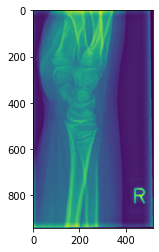

In [115]:
# Convert the tensor to a numpy array
numpy_image = imgs[1].numpy()

# Transpose the dimensions to match the expected order of matplotlib
# (height, width, channels)
numpy_image = numpy_image.transpose(1, 2, 0)

# Display the image using matplotlib
plt.imshow(numpy_image)
plt.show()

## This is the format that the rcnn expects from torch vision page


In [57]:
# For training
images, boxes = torch.rand(4, 3, 600, 1200), torch.rand(4, 11, 4)
boxes[:, :, 2:4] = boxes[:, :, 0:2] + boxes[:, :, 2:4]
labels = torch.randint(1, 91, (4, 11))
images = list(image for image in images)
targets = []
for i in range(len(images)):
     d = {}
     d['boxes'] = boxes[i]
     d['labels'] = labels[i]
     targets.append(d)

In [58]:
images

[tensor([[[0.9648, 0.2748, 0.3952,  ..., 0.3912, 0.7996, 0.8107],
          [0.0182, 0.3422, 0.7833,  ..., 0.4842, 0.7953, 0.3864],
          [0.3036, 0.0088, 0.5207,  ..., 0.5771, 0.5641, 0.2428],
          ...,
          [0.8552, 0.4564, 0.9105,  ..., 0.2869, 0.5460, 0.1557],
          [0.1817, 0.2592, 0.4948,  ..., 0.6056, 0.0470, 0.9871],
          [0.9897, 0.6970, 0.9270,  ..., 0.7413, 0.2995, 0.9297]],
 
         [[0.5305, 0.9752, 0.1717,  ..., 0.3844, 0.7257, 0.6050],
          [0.7612, 0.3332, 0.8411,  ..., 0.9426, 0.9635, 0.4533],
          [0.8476, 0.8184, 0.5191,  ..., 0.8281, 0.1046, 0.1554],
          ...,
          [0.6939, 0.4452, 0.1864,  ..., 0.5977, 0.6016, 0.2551],
          [0.3951, 0.8366, 0.7595,  ..., 0.6455, 0.0741, 0.2859],
          [0.9213, 0.6760, 0.1259,  ..., 0.8351, 0.4696, 0.4460]],
 
         [[0.5033, 0.3878, 0.3785,  ..., 0.2252, 0.9801, 0.1663],
          [0.7655, 0.1212, 0.6959,  ..., 0.6015, 0.9115, 0.4142],
          [0.7675, 0.1640, 0.3970,  ...,

In [59]:
targets

[{'boxes': tensor([[0.1254, 0.7629, 0.2800, 1.6559],
          [0.5753, 0.5340, 0.7461, 1.1709],
          [0.1292, 0.8833, 1.0966, 1.1589],
          [0.7821, 0.2711, 1.0094, 0.7569],
          [0.0953, 0.1862, 0.2000, 0.3718],
          [0.8621, 0.2250, 1.0386, 1.2034],
          [0.6239, 0.7993, 1.3138, 1.3070],
          [0.9715, 0.4067, 1.4113, 1.1847],
          [0.0187, 0.6747, 0.5431, 0.9209],
          [0.6454, 0.0222, 1.0804, 0.6946],
          [0.2927, 0.4516, 0.8516, 1.0097]]),
  'labels': tensor([49, 17, 47, 40, 33, 59, 25, 21, 23, 18, 42])},
 {'boxes': tensor([[0.7980, 0.5652, 0.9249, 0.9803],
          [0.1140, 0.5431, 0.6424, 1.1565],
          [0.8206, 0.8962, 0.8451, 0.9257],
          [0.8237, 0.9970, 1.5261, 1.0498],
          [0.6957, 0.3752, 1.2875, 0.5403],
          [0.4276, 0.0476, 0.9964, 0.6663],
          [0.7892, 0.1351, 1.1340, 0.7018],
          [0.8213, 0.6131, 1.6875, 0.9043],
          [0.9875, 0.1923, 1.5623, 0.8371],
          [0.1325, 0.0701, 0.6749

In [68]:
#load train data
train_dataset = XRayDataSet(pathlib.Path('../literature/Other/supervisely/wrist/pickle_data'))
training_dataloader = DataLoader(train_dataset, batch_size=BatchSize, shuffle=True, num_workers=num_workers,collate_fn=collate_fn)

In [69]:
images , targets = next(iter(training_dataloader))

In [70]:
imgs =list(img.to(device) for img in images)


In [71]:
imgs

[tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
       

In [74]:
annotations = [{k: v for k, v in t.items()} for t in targets]

In [77]:
annotations

[{'boxes': tensor([[368., 111., 403., 150.]]),
  'labels': tensor([2]),
  'image_id': tensor([3]),
  'area': tensor([1365]),
  'iscrowd': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])},
 {'boxes': tensor([[  1., 577.,  55., 641.]]),
  'labels': tensor([2]),
  'image_id': tensor([0]),
  'area': tensor([3456]),
  'iscrowd': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,